### 工作進度  
* 【置頂】**新的筆記內容架構**與**量化技術分析系統**相關資訊請參閱[250801筆記.ipynb](https://github.com/yilintung/StockInvestmentNotebook/blob/main/250801%E7%AD%86%E8%A8%98.ipynb)之「工作進度」。  
* 本日「K線追擊週報」LINE群組資訊：[楊忠憲K線追擊週報_251015日報.docx](https://mega.nz/file/Kw4yHbyQ#ltEfXz7yV0_BSqyM8oSZJ0b65csamzvfnMEfpIDwP2w)。  

* 引入模組與定義公用函式  

In [1]:
import numpy as np
import mysys
import markdown
import base64
from IPython.core.display import HTML

In [2]:
def stock_analysis( analysis, stock_id, buttom_pattern = False) :
    results,images = analysis.analysis(stock_id)
    if buttom_pattern is True and '底部型態' in images :
        print('底型反轉交易策略：')
        display(images['底部型態'])
    print('解盤內容：')
    if '整體評價' in images :
        display(images['整體評價'])
    result_md   = results.to_markdown(tablefmt="grid")
    result_html = markdown.markdown(result_md, extensions=['markdown_grid_tables:GridTableExtension'])
    display(HTML(result_html))

* 更新量化技術分析資料庫  

In [3]:
mysys.UpdatestockDatabase()

2025-10-15 21:18:49.895 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockInfo, data_id: 


##### 更新台股總覽 #####
##### 更新技術分析資料 #####


2025-10-15 21:19:18.176 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-10-15 21:19:23.632 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-10-15 21:19:55.815 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-10-15 21:20:01.472 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-10-15 21:20:06.832 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-10-15 21:20:32.838 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-10-15 21:20:38.467 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-10-15 21:20:43.735 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-10-15 21:21:06.101 | INFO     | FinMind.data.finmind_api:get_data:155 - download Ta

日K：2025-10-15


* 建立「解盤」物件    

In [4]:
analysis = mysys.StockAnalysis()

### 大盤解盤  

* 加權指數  

> **盤後**：量化技術分析  

解盤內容：


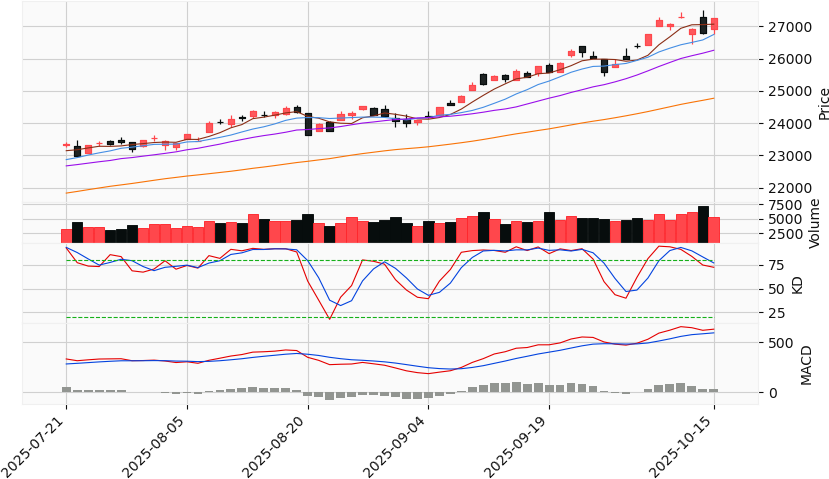

In [5]:
# 盤後：加權指數解盤
stock_analysis(analysis,'TAIEX')

* 櫃買指數   

> **盤後**：量化技術分析  

解盤內容：


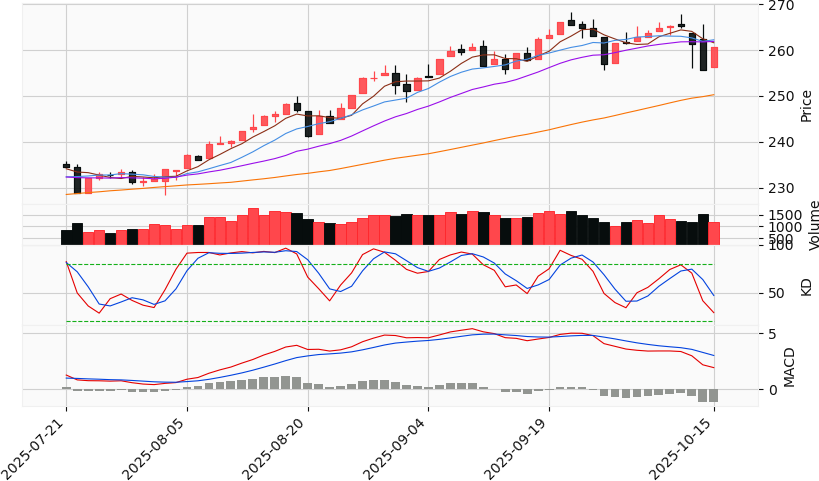

In [6]:
# 盤後：櫃買指數解盤
stock_analysis(analysis,'TPEx')

### 個股解盤  
* 觀察股調整：    
  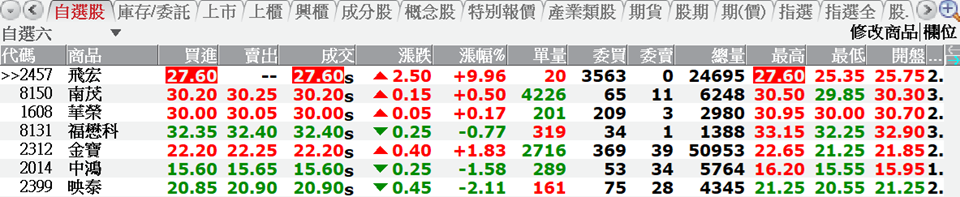  

* 南茂(8150)  
  看法：頸線支撐有守，但短期區間震盪。這檔先追縱到今日。  

> **盤後**：量化技術分析  

解盤內容：


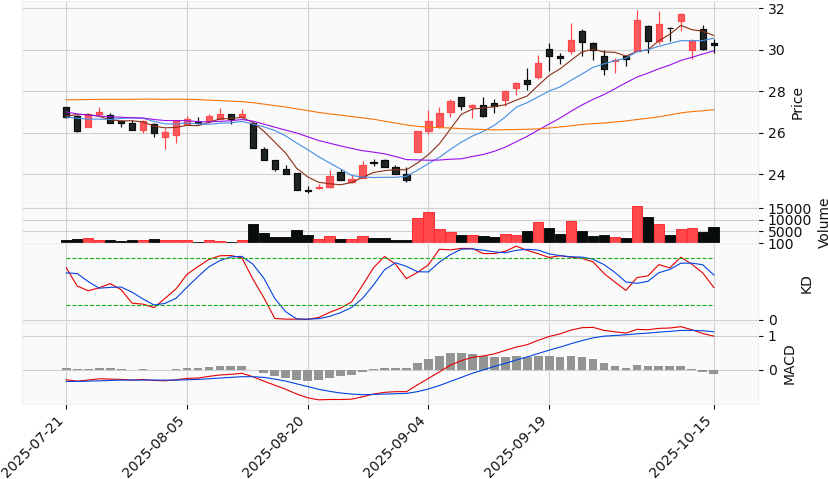

In [7]:
stock_analysis(analysis,'8150')

> **盤後**：底部反轉交易策略分析    

In [8]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-03-11'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-06-11']['Close']

    # 設定底部日期與價格
    bottom_date  = '2025-08-19'
    bottom_price = range_prices.loc['2025-08-19']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2025-10-02'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

估算目標價為36.55元


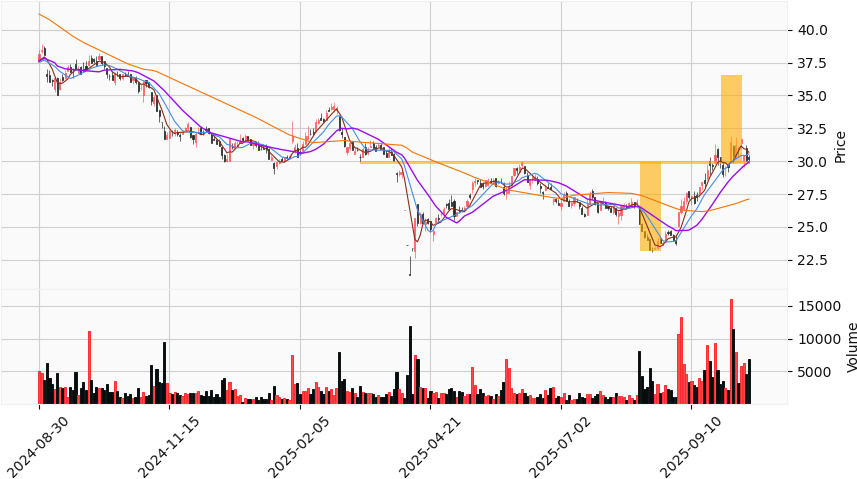

In [9]:
image = mysys.DrawOnKlineChart('8150','2024-08-30','2025-10-15',line_drawing_callback)
display(image)

籌碼面：  
法人小買(+314)：外資小買(+294)、投信中立(-1)、自營小買(+21)。  
主力小買(+196)。  
分公司買賣家數差分散(-20)。  
融資減(-61)、融券減(-2)。  

* 飛宏(2457)  
  看法：漲停突破底型。    

> **盤後**：量化技術分析  

解盤內容：


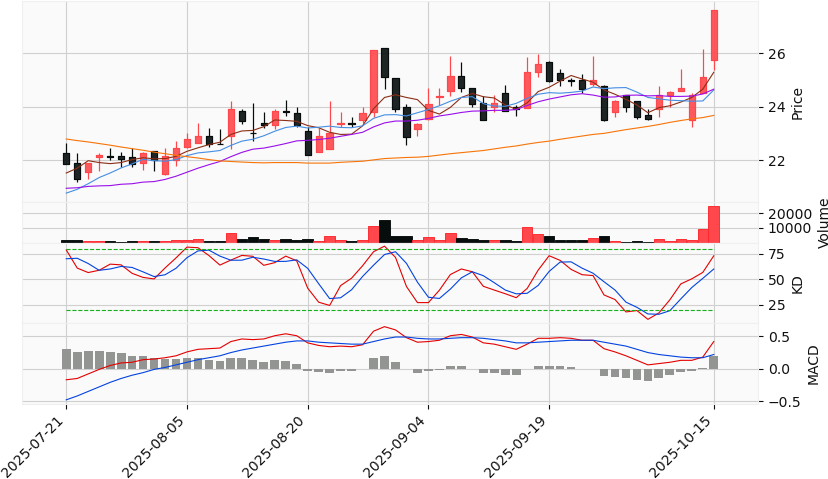

In [10]:
stock_analysis(analysis,'2457')

> **盤後**：底部反轉交易策略分析  
> 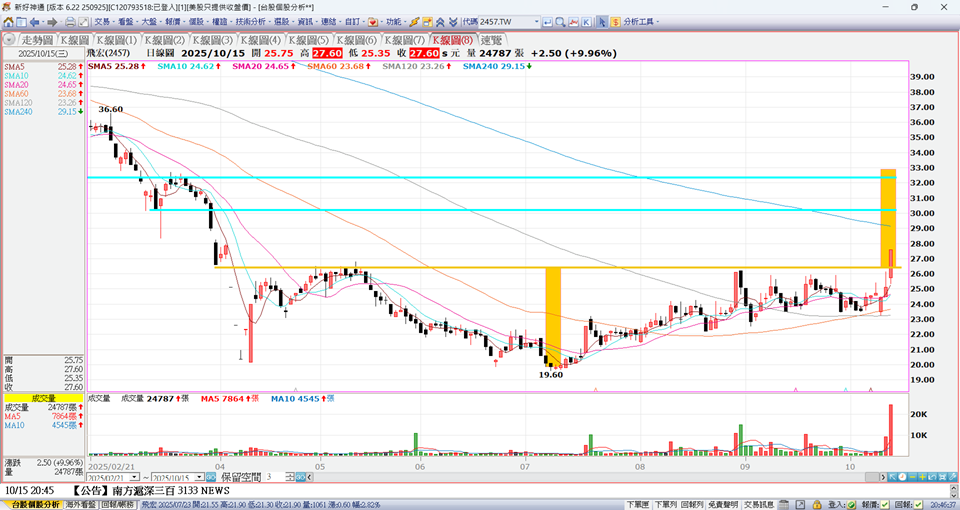  

In [11]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-03-26'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-05-09']['Open']

    # 設定底部日期與價格
    bottom_date  = '2025-07-09'
    bottom_price = range_prices.loc['2025-07-09']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2025-10-15'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

估算目標價為33.00元


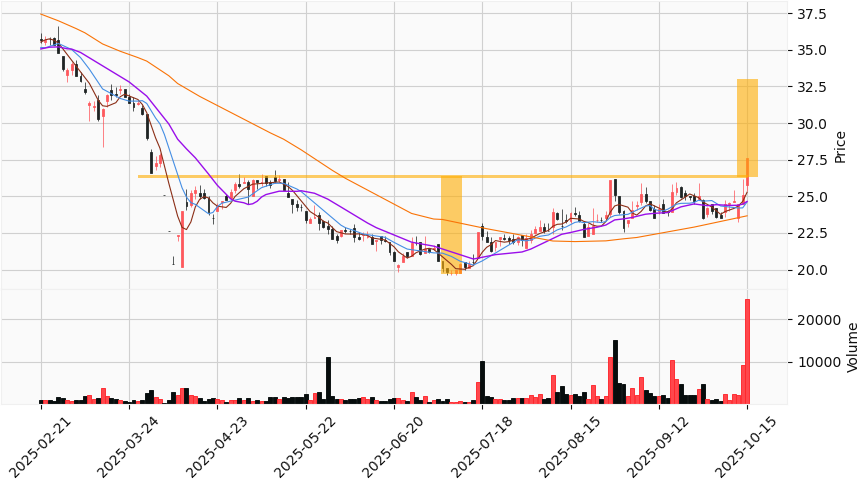

In [12]:
image = mysys.DrawOnKlineChart('2457','2025-02-21','2025-10-15',line_drawing_callback)
display(image)

籌碼面：  
法人小買(+578)：外資小賣(-604)、投信中立(0)、自營大買(+1182)。  
主力大買(+2219)。  
分公司買賣家數差集中(+22)。  
融資大增(+1293)、融券增(+289)。  